In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

In [2]:
covid = pd.read_csv(r"C:\Users\samer\Desktop\Machine Learning\Complementary Stuff\covid_19_data.csv")

In [3]:
covid.head(10) 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [4]:
print("Size/Shape of the dataset",covid.shape)

Size/Shape of the dataset (18327, 8)


In [5]:
print("Checking for null values ",covid.isnull().sum())

Checking for null values  SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [6]:
print("Checking Data-type",covid.dtypes)

Checking Data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [7]:
# Dropping the column
covid.drop(['SNo'], 1, inplace = True)

In [8]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [9]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

In [10]:
# Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [11]:
datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-04-20,2472259.0,645738.0,169986.0
2020-04-21,2549123.0,679819.0,176583.0
2020-04-22,2623960.0,709694.0,183066.0


In [12]:
print("Basic Information")
print("Total number of Confirmed cases around the world: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world: ",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world: ",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world: ",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic Information
Total number of Confirmed cases around the world:  2811193.0
Total number of Recovered cases around the world:  793601.0
Total number of Death cases around the world:  197159.0
Total number of Active cases around the world:  1820433.0
Total number of Closed cases around the world:  990760.0


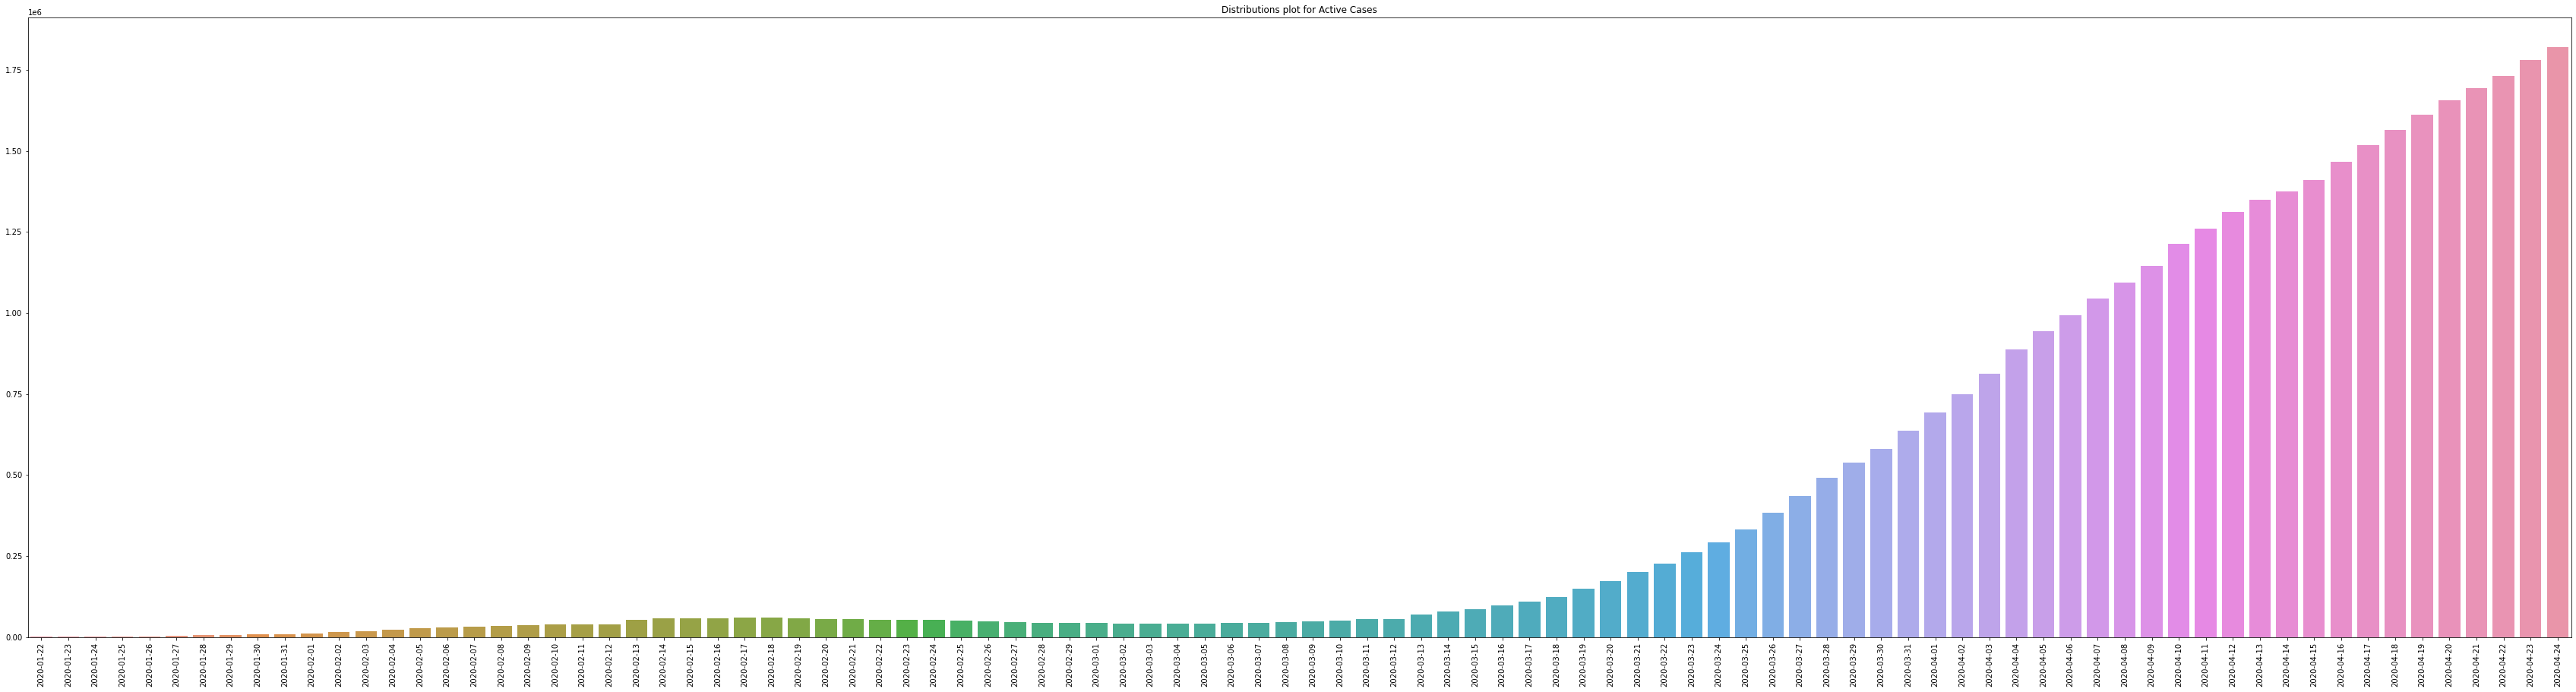

In [13]:
plt.figure(figsize=(60,15))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)
plt.show()

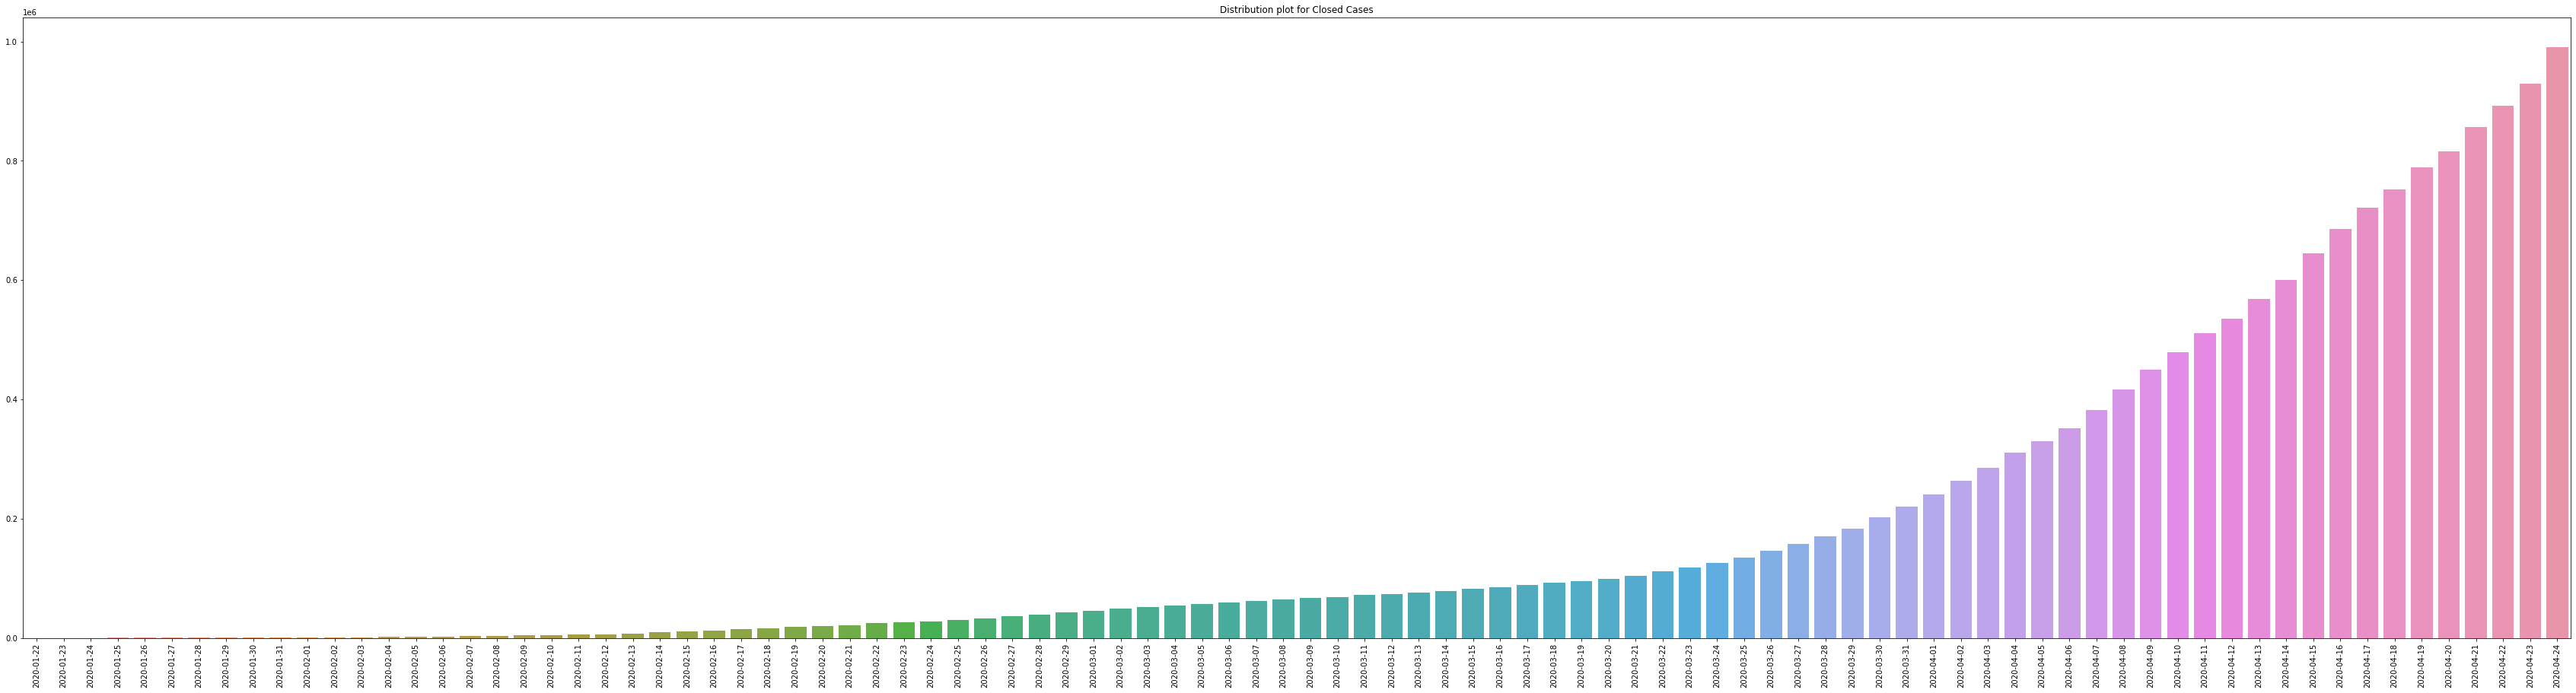

In [14]:
plt.figure(figsize=(60,15))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

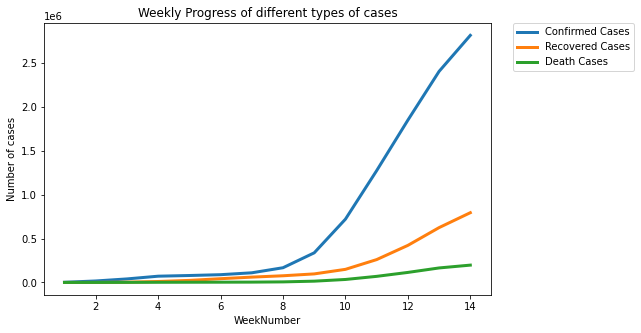

In [15]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3, label = 'Confirmed Cases')
plt.plot(week_num,weekwise_recovered,linewidth =3, label = 'Recovered Cases')
plt.plot(week_num,weekwise_deaths,linewidth = 3, label = 'Death Cases')
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Weekly Progress of different types of cases")

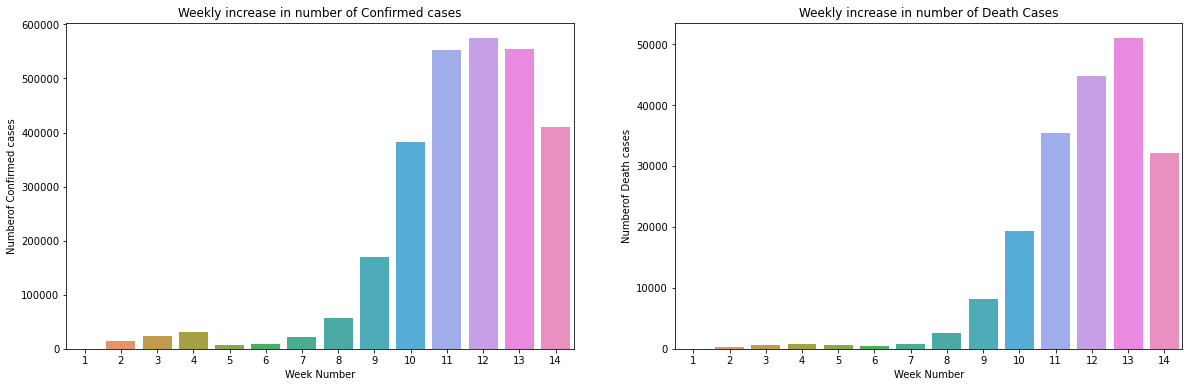

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

In [17]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed cases everyday: 29900.0
Average increase in number of Recovered cases everyday: 8442.0
Average increase in number of Death cases everyday: 2097.0


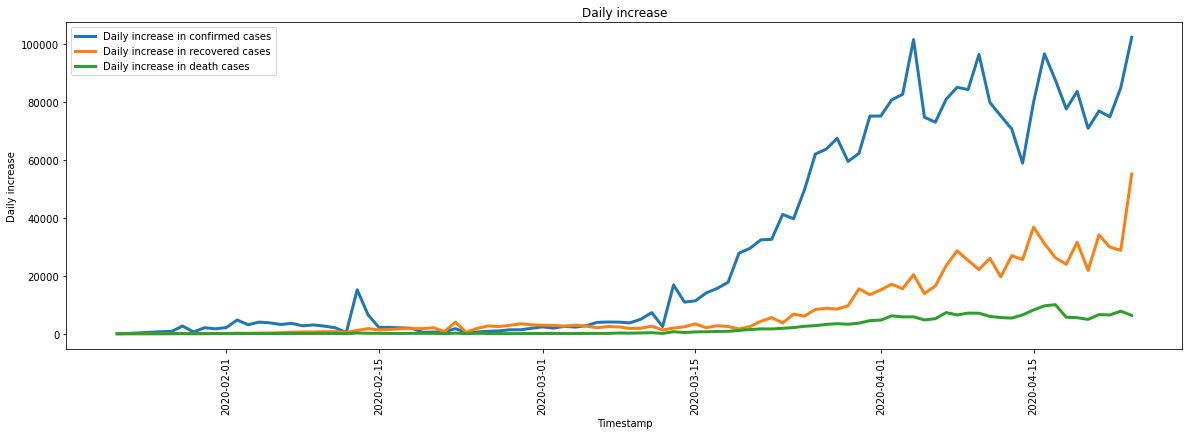

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [19]:
#Country wise analysis
#Calculating Country wise Mortality rate
countrywise= covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [20]:
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)

Text(0.5, 1.0, 'Top 15 countries as per number of confirmed cases')

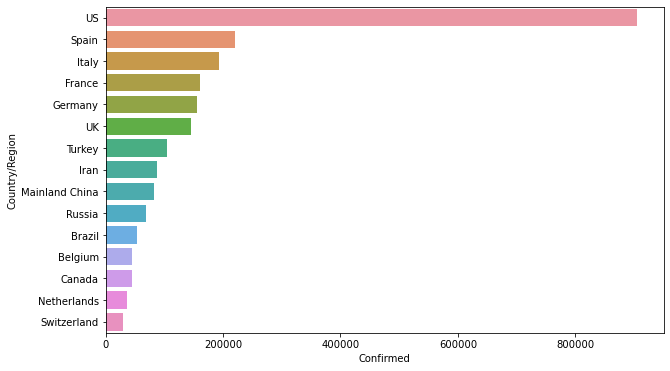

In [21]:
fig = plt.subplots(1,1,figsize=(10,6))
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index)
ax1.set_title("Top 15 countries as per number of confirmed cases")

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

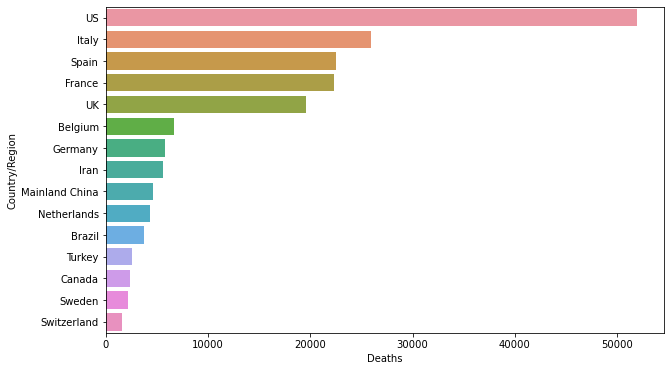

In [22]:
fig = plt.subplots(1,1,figsize=(10,6))
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index)
ax2.set_title("Top 15 countries as per number of death cases")

In [23]:
# Data Anlaysis for Lebanon
Lebanon_data = covid[covid["Country/Region"]=="Lebanon"]
datewise_Lebanon = Lebanon_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

print(datewise_Lebanon.iloc[-1])
print("Total Active Cases",datewise_Lebanon["Confirmed"].iloc[-1]-datewise_Lebanon["Recovered"].iloc[-1]-datewise_Lebanon["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_Lebanon["Recovered"].iloc[-1]+datewise_Lebanon["Deaths"].iloc[-1])

Confirmed    696.0
Recovered    140.0
Deaths        22.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 534.0
Total Closed Cases 162.0


In [24]:
# Data Anlaysis for Brazil
brazil_data = covid[covid["Country/Region"]=="Brazil"]
datewise_brazil = brazil_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

print(datewise_brazil.iloc[-1])
print("Total Active Cases",datewise_brazil["Confirmed"].iloc[-1]-datewise_brazil["Recovered"].iloc[-1]-datewise_brazil["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_brazil["Recovered"].iloc[-1]+datewise_brazil["Deaths"].iloc[-1])

Confirmed    54043.0
Recovered    27655.0
Deaths        3704.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 22684.0
Total Closed Cases 31359.0


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

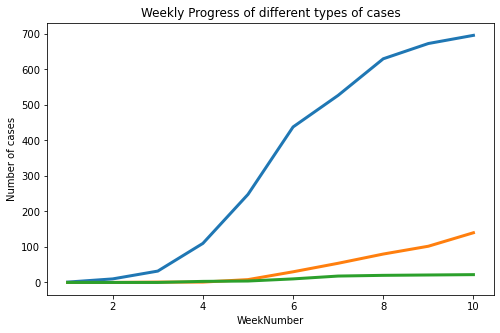

In [25]:
datewise_Lebanon["WeekofYear"] = datewise_Lebanon.index.weekofyear
week_num_Lebanon = []
Lebanon_weekwise_confirmed = []
Lebanon_weekwise_recovered = []
Lebanon_weekwise_deaths = []
w = 1
for i in list(datewise_Lebanon["WeekofYear"].unique()):
    Lebanon_weekwise_confirmed.append(datewise_Lebanon[datewise_Lebanon["WeekofYear"]==i]["Confirmed"].iloc[-1])
    Lebanon_weekwise_recovered.append(datewise_Lebanon[datewise_Lebanon["WeekofYear"]==i]["Recovered"].iloc[-1])
    Lebanon_weekwise_deaths.append(datewise_Lebanon[datewise_Lebanon["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_Lebanon.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_Lebanon,Lebanon_weekwise_confirmed,linewidth=3)
plt.plot(week_num_Lebanon,Lebanon_weekwise_recovered,linewidth =3)
plt.plot(week_num_Lebanon,Lebanon_weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [26]:
max_Lebanon = datewise_Lebanon["Confirmed"].max()

china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
india_data = covid[covid["Country/Region"]=="India"]
brazil_data = covid[covid["Country/Region"]=="Brazil"]

datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_brazil=brazil_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [27]:
print("It took",datewise_Lebanon[datewise_Lebanon["Confirmed"]>0].shape[0],"days in Lebanon to reach",max_Lebanon,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_Lebanon)].shape[0],"days in Italy to reach", max_Lebanon, "Confirmed Cases")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_Lebanon)].shape[0],"days in US to reach", max_Lebanon, "Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_Lebanon)].shape[0],"days in Spain to reach", max_Lebanon, "Confirmed Cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_Lebanon)].shape[0],"days in China to reach", max_Lebanon, "Confirmed Cases")
print("It took",datewise_india[(datewise_india["Confirmed"]>0)&(datewise_india["Confirmed"]<=max_Lebanon)].shape[0],"days in India to reach", max_Lebanon, "Confirmed Cases")
print("It took",datewise_brazil[(datewise_brazil["Confirmed"]>0)&(datewise_brazil["Confirmed"]<=max_Lebanon)].shape[0],"days in Brazil to reach", max_Lebanon, "Confirmed Cases")

It took 64 days in Lebanon to reach 696.0 Confirmed Cases
It took 28 days in Italy to reach 696.0 Confirmed Cases
It took 48 days in US to reach 696.0 Confirmed Cases
It took 37 days in Spain to reach 696.0 Confirmed Cases
It took 2 days in China to reach 696.0 Confirmed Cases
It took 56 days in India to reach 696.0 Confirmed Cases
It took 23 days in Brazil to reach 696.0 Confirmed Cases


In [28]:
max_ind = datewise_india["Confirmed"].max()

print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed Cases")

It took 86 days in India to reach 24530.0 Confirmed Cases
It took 44 days in Italy to reach number of Confirmed Cases
It took 59 days in US to reach number of Confirmed Cases
It took 49 days in Spain to reach number of Confirmed Cases
It took 14 days in China to reach number of Confirmed Cases


In [29]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [30]:
train_ml

,Confirmed,Recovered,Deaths,WeekofYear,Days Since
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,4,0
2020-01-23,653.0,30.0,18.0,4,1
2020-01-24,941.0,36.0,26.0,4,2
2020-01-25,1438.0,39.0,42.0,4,3
2020-01-26,2118.0,52.0,56.0,4,4
...,...,...,...,...,...
2020-04-15,2056055.0,511019.0,134177.0,16,84
2020-04-16,2152647.0,542107.0,143801.0,16,85
2020-04-17,2240191.0,568343.0,153822.0,16,86


In [31]:
valid_ml

,Confirmed,Recovered,Deaths,WeekofYear,Days Since
ObservationDate,,,,,
2020-04-20,2472259.0,645738.0,169986.0,17,89
2020-04-21,2549123.0,679819.0,176583.0,17,90
2020-04-22,2623960.0,709694.0,183066.0,17,91
2020-04-23,2708885.0,738486.0,190858.0,17,92
2020-04-24,2811193.0,793601.0,197159.0,17,93


In [32]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(normalize=True)

In [33]:
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [34]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_lin_reg

array([[1452077.60495403],
       [1473767.80017024],
       [1495457.99538645],
       [1517148.19060266],
       [1538838.38581886]])

In [35]:
prediction_valid_lin_reg = np.hstack(prediction_valid_lin_reg)
prediction_valid_lin_reg

array([1452077.60495403, 1473767.80017024, 1495457.99538645,
       1517148.19060266, 1538838.38581886])

In [36]:
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm

array([2538434.9452102 , 2681791.10101898, 2831662.21189101,
       2988267.85579243, 3151832.4899019 ])

In [37]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions

,Dates,LR,SVR
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245
5,2020-04-30,1668980,4292557
6,2020-05-01,1690670,4511540
7,2020-05-02,1712360,4739461
8,2020-05-03,1734050,4976588
9,2020-05-04,1755740,5223200


In [38]:
holt=Holt(np.asarray(train_ml["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid_ml.copy()
y_pred["Holt"]=holt.forecast(len(valid_ml))
y_pred

,Confirmed,Recovered,Deaths,WeekofYear,Days Since,Holt
ObservationDate,,,,,,
2020-04-20,2472259,645738,169986,17,89,2484922
2020-04-21,2549123,679819,176583,17,90,2566430
2020-04-22,2623960,709694,183066,17,91,2647939
2020-04-23,2708885,738486,190858,17,92,2729447
2020-04-24,2811193,793601,197159,17,93,2810956


In [39]:
prediction_valid_holt = y_pred["Holt"].to_numpy()
prediction_valid_holt

array([2484921.9539992 , 2566430.35006638, 2647938.74613355,
       2729447.14220073, 2810955.53826791])

In [40]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid_ml)+i))[-1])

model_predictions["Holts"]=holt_new_prediction

In [41]:
model_predictions

,Dates,LR,SVR,Holts
0,2020-04-25,1560529,3322586,2892464
1,2020-04-26,1582219,3500761,2973972
2,2020-04-27,1603909,3686599,3055481
3,2020-04-28,1625599,3880344,3136989
4,2020-04-29,1647289,4082245,3218498
5,2020-04-30,1668980,4292557,3300006
6,2020-05-01,1690670,4511540,3381514
7,2020-05-02,1712360,4739461,3463023
8,2020-05-03,1734050,4976588,3544531
9,2020-05-04,1755740,5223200,3626039
